<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_assignment_5/blob/main/Spatio%20Temporal%20Data/Spatio_temporal_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://medium.com/@rutikrasik.darda/data-mining-a-spatio-temporal-dataset-with-chat-gpt-4-4fb4a93d60e5"><img src="https://github-readme-medium-recent-article.vercel.app/medium/@username/index" alt="Medium Article">

**EDA -**

In [3]:
# Load the uploaded dataset
import pandas as pd
uploaded_df = pd.read_csv("/content/spatio_temporal_dataset.csv")

# Display the first few rows of the uploaded dataset
uploaded_df.head()


,Time Step,x,y,Temperature
0,0,0,0,25.693355
1,0,0,1,21.233949
2,0,0,2,28.390012
3,0,0,3,20.170806
4,0,0,4,24.772865


In [4]:
# Get the shape of the dataset
shape = uploaded_df.shape

# Get data types of each column
data_types = uploaded_df.dtypes

# Get basic statistics for the dataset
basic_stats = uploaded_df.describe()

shape, data_types, basic_stats


((250, 4),
 Time Step        int64
 x                int64
 y                int64
 Temperature    float64
 dtype: object,
         Time Step           x           y  Temperature
 count  250.000000  250.000000  250.000000   250.000000
 mean     4.500000    2.000000    2.000000    24.886610
 std      2.878043    1.417051    1.417051     2.818064
 min      0.000000    0.000000    0.000000    20.134735
 25%      2.000000    1.000000    1.000000    22.453528
 50%      4.500000    2.000000    2.000000    24.849563
 75%      7.000000    3.000000    3.000000    27.209542
 max      9.000000    4.000000    4.000000    29.911082)

In [5]:
# Check for missing values in the dataset
missing_values = uploaded_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = uploaded_df.duplicated().sum()

missing_values, duplicate_rows


(Time Step      0
 x              0
 y              0
 Temperature    0
 dtype: int64,
 0)

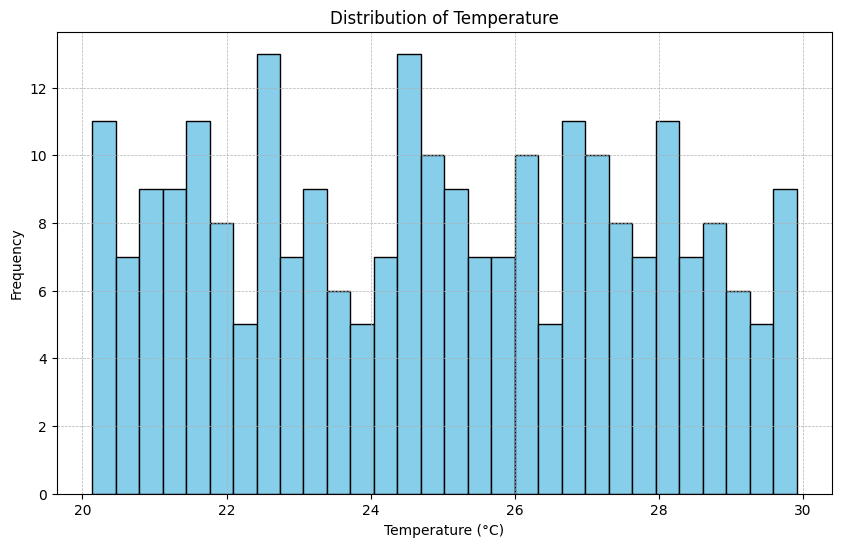

In [6]:
import matplotlib.pyplot as plt

# Plotting the distribution of Temperature
plt.figure(figsize=(10, 6))
plt.hist(uploaded_df['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


NameError: ignored

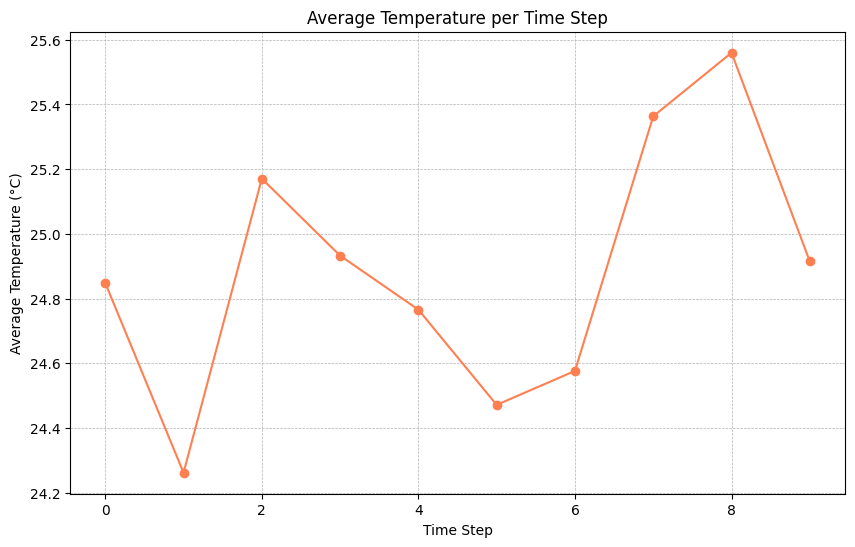

In [8]:
# Calculate average temperature for each time step
average_temp_per_timestep = uploaded_df.groupby('Time Step')['Temperature'].mean()

# Plotting the average temperature per time step
plt.figure(figsize=(10, 6))
average_temp_per_timestep.plot(kind='line', marker='o', color='coral')
plt.title('Average Temperature per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(list(range(0, T)))
plt.show()


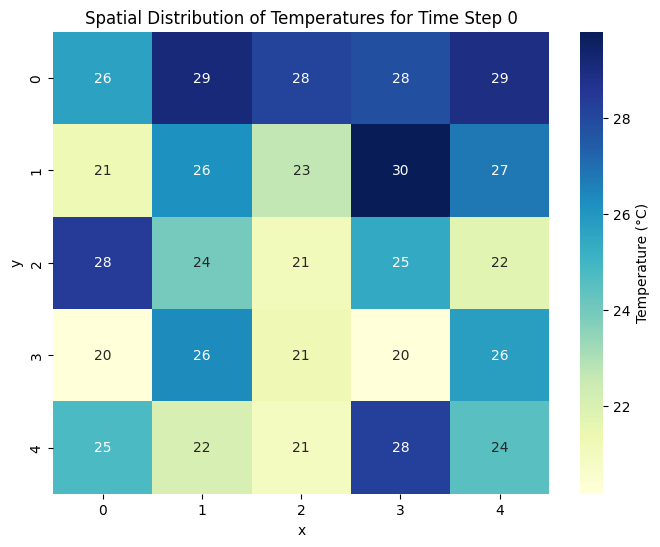

In [9]:
import seaborn as sns

# Filter data for Time Step 0
time_step_0_data = uploaded_df[uploaded_df['Time Step'] == 0]

# Create a matrix for temperature values for Time Step 0
temperature_matrix = time_step_0_data.pivot(index='y', columns='x', values='Temperature')

# Plotting the heatmap for spatial distribution of temperatures for Time Step 0
plt.figure(figsize=(8, 6))
sns.heatmap(temperature_matrix, cmap="YlGnBu", annot=True, cbar_kws={'label': 'Temperature (°C)'})
plt.title('Spatial Distribution of Temperatures for Time Step 0')
plt.show()


**Clsutering -**

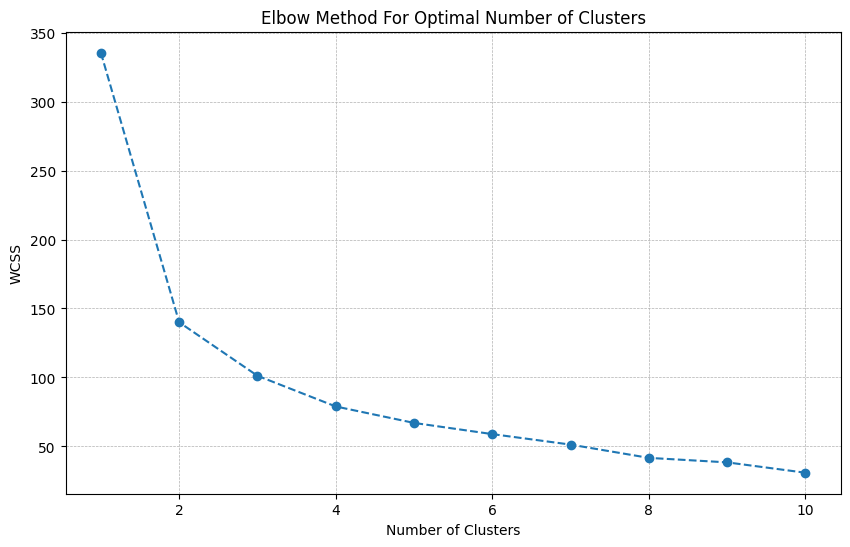

In [11]:
from sklearn.cluster import KMeans

# Filter data for Time Step 0
time_step_0_data = uploaded_df[uploaded_df['Time Step'] == 0][['x', 'y', 'Temperature']]

# Determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
possible_clusters = range(1, 11)  # we'll check for up to 10 clusters

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(time_step_0_data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


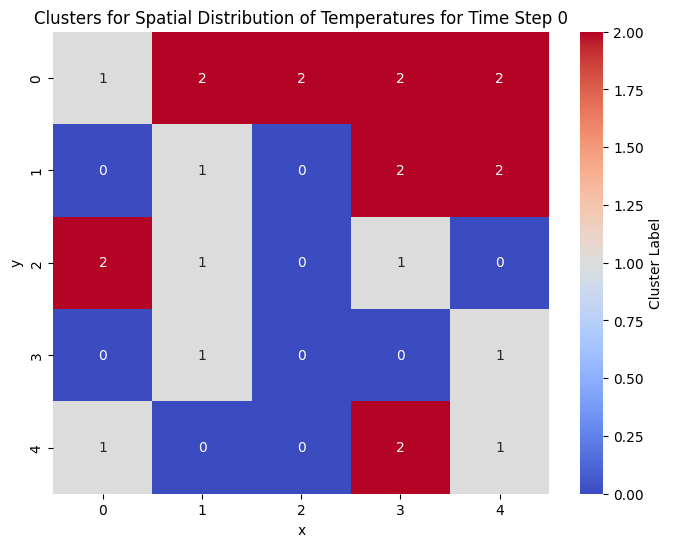

In [12]:
# Applying KMeans clustering for k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
time_step_0_data['Cluster'] = kmeans.fit_predict(time_step_0_data)

# Create a matrix for cluster labels for Time Step 0
cluster_matrix = time_step_0_data.pivot(index='y', columns='x', values='Cluster')

# Plotting the clusters on the spatial grid for Time Step 0
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_matrix, cmap="coolwarm", annot=True, cbar_kws={'label': 'Cluster Label'})
plt.title('Clusters for Spatial Distribution of Temperatures for Time Step 0')
plt.show()


**Model -**

In [19]:
!pip install pycaret


  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [20]:
from pycaret.regression import *


In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/spatio_temporal_dataset.csv")

# Display the first few rows of the dataset
data.head()


,Time Step,x,y,Temperature
0,0,0,0,25.693355
1,0,0,1,21.233949
2,0,0,2,28.390012
3,0,0,3,20.170806
4,0,0,4,24.772865


In [22]:
reg_setup = setup(data, target='Temperature', session_id=123)


,Description,Value
0,Session id,123
1,Target,Temperature
2,Target type,Regression
3,Original data shape,"(250, 4)"
4,Transformed data shape,"(250, 4)"
5,Transformed train set shape,"(175, 4)"
6,Transformed test set shape,"(75, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [23]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.5283,8.3810,2.8802,-0.1520,0.1126,0.1041,0.0310
lr,Linear Regression,2.5284,8.3816,2.8803,-0.1521,0.1126,0.1041,1.1340
lar,Least Angle Regression,2.5284,8.3816,2.8803,-0.1521,0.1126,0.1041,0.0410
br,Bayesian Ridge,2.5345,8.4295,2.8916,-0.1568,0.1130,0.1044,0.0570
omp,Orthogonal Matching Pursuit,2.5291,8.4838,2.9009,-0.1634,0.1135,0.1043,0.0390
en,Elastic Net,2.5415,8.4897,2.9024,-0.1658,0.1135,0.1047,0.0390
dummy,Dummy Regressor,2.5373,8.4964,2.9040,-0.1673,0.1135,0.1046,0.0260
llar,Lasso Least Angle Regression,2.5377,8.4976,2.9041,-0.1674,0.1135,0.1046,0.0480
lasso,Lasso Regression,2.5377,8.4976,2.9041,-0.1674,0.1135,0.1046,0.0860
huber,Huber Regressor,2.5468,8.5295,2.9052,-0.1713,0.1135,0.1046,0.0450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [24]:
dt = create_model('dt')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8890,19.0210,4.3613,-1.9829,0.1678,0.1635
1,3.6557,19.9955,4.4716,-1.1539,0.1757,0.1553
2,3.0626,14.6546,3.8281,-0.6802,0.1494,0.1235
3,3.3128,15.8124,3.9765,-0.5444,0.1553,0.1355
4,2.8381,13.7840,3.7127,-0.7994,0.1467,0.1257
5,3.7406,19.7587,4.4451,-2.9141,0.1731,0.1677
6,2.9172,13.8197,3.7175,-0.9159,0.1428,0.1192
7,3.4270,15.8942,3.9868,-0.9248,0.1509,0.1360
8,3.2141,15.6945,3.9616,-1.3245,0.1568,0.1270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
tuned_dt = tune_model(dt)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2020,6.3950,2.5288,-0.0029,0.0986,0.0904
1,2.7676,9.4774,3.0785,-0.0209,0.1223,0.1171
2,2.7442,9.4583,3.0754,-0.0844,0.1169,0.1074
3,2.8919,10.7279,3.2753,-0.0478,0.1264,0.1160
4,2.7516,8.8849,2.9807,-0.1598,0.1193,0.1187
5,2.7116,9.8730,3.1421,-0.9558,0.1305,0.1252
6,2.3047,7.3243,2.7063,-0.0154,0.1064,0.0964
7,2.3132,8.6831,2.9467,-0.0515,0.1116,0.0903
8,2.4348,8.0323,2.8341,-0.1897,0.1087,0.0955


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [26]:
plot_model(tuned_dt)


ImportError: ignored

In [ ]:
final_dt = finalize_model(tuned_dt)
save_model(final_dt, 'final_dt_model')
